<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 1 - Phase 1 - Fernanda

This phase aims at:

- Extracting data for a pilot Lexical Multi-Dimensional Analysis.

## Required Python packages

- pandas
- PyMuPDF
- tqdm

## Import the required libraries

In [21]:
import os
import sys
import pandas as pd
import fitz  # PyMuPDF
import logging
from tqdm import tqdm
import shutil
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Define input variables

In [2]:
input_directory = 'cl_st1_ph1_fernanda_folders'
output_directory = 'cl_st1_ph1_output'
log_filename = f"{output_directory}/cl_st1_ph1_fernanda.log"

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory successfully created.


## Set up logging

In [3]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename = log_filename
)

## Import the directory structure into a DataFrame

In [4]:
# Initialising an empty list to hold the directory information
directory_data = []

# Walking through the directory structure
for root, dirs, files in os.walk(input_directory):
    #for file in tqdm(files, desc='Processing files'):
    for file in files:
        if file.endswith('.pdf'):
            try:
                # Getting the full file path
                file_path = os.path.join(root, file)
                # Splitting the root into individual directories
                directory_parts = root.split(os.sep)
                # Creating a dictionary for this file's information
                file_info = {'File': file}
                # Adding the file path to the dictionary
                file_info['File Path'] = file_path
                # Adding each part of the directory to the dictionary with appropriate keys
                for i, part in enumerate(directory_parts):
                    file_info[f"Directory Level {i+1}"] = part
                
                # Opening the PDF file
                document = fitz.open(file_path)
                # Extracting text from each page
                text = ''
                for page_num in range(document.page_count):
                    page = document[page_num]
                    text += page.get_text()

                file_info['Scraped Text'] = text
                document.close()
                
                # Adding the file info to the list
                directory_data.append(file_info)
                
                # Logging the successful extraction
                logging.info(f"Successfully scraped {file_path}")
            except Exception as e:
                # Logging any errors
                logging.error(f"Error scraping {file_path}: {str(e)}")

# Converting the list of dictionaries into a DataFrame
df = pd.DataFrame(directory_data)

In [5]:
df

,File,File Path,Directory Level 1,Directory Level 2,Directory Level 3,Directory Level 4,Directory Level 5,Scraped Text
0,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
1,CPA 2023 Fatec Mauá.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u113...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u113,1 \n____________________...
2,CPA 2023 Fatec São Bernardo do Campo.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u126...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u126,1 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...
3,CPA 2023 Fatec Praia Grande.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u129...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u129,\n_ \nAdministração Central \nUnidade do Ens...
4,CPA 2023 Fatec Zona Sul.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u137...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u137,\n___________________________________________...
...,...,...,...,...,...,...,...,...
108,PP_RAA 2024 Fatec_Cotia.pdf,cl_st1_ph1_fernanda_folders\raa\24\r06\u270\PP...,cl_st1_ph1_fernanda_folders,raa,24,r06,u270,\n \n \nAdministração Central - Unidade do E...
109,RADE e2022_r2024 Fatec_Praia Grande v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u12...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u129,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
110,RADE e2022_r2024 Fatec_Zona Sul v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u13...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u137,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
111,RADE e2022_r2024 Fatec_São Caetano do Sul v.02...,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u16...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u168,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...


## Rename the columns

In [6]:
df = df.rename(columns={'Directory Level 1': 'Root Directory', 'Directory Level 2': 'Document Type', 'Directory Level 3': 'Year', 'Directory Level 4': 'Branch', 'Directory Level 5': 'Unit'})

In [7]:
df

,File,File Path,Root Directory,Document Type,Year,Branch,Unit,Scraped Text
0,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
1,CPA 2023 Fatec Mauá.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u113...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u113,1 \n____________________...
2,CPA 2023 Fatec São Bernardo do Campo.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u126...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u126,1 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...
3,CPA 2023 Fatec Praia Grande.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u129...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u129,\n_ \nAdministração Central \nUnidade do Ens...
4,CPA 2023 Fatec Zona Sul.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u137...,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u137,\n___________________________________________...
...,...,...,...,...,...,...,...,...
108,PP_RAA 2024 Fatec_Cotia.pdf,cl_st1_ph1_fernanda_folders\raa\24\r06\u270\PP...,cl_st1_ph1_fernanda_folders,raa,24,r06,u270,\n \n \nAdministração Central - Unidade do E...
109,RADE e2022_r2024 Fatec_Praia Grande v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u12...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u129,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
110,RADE e2022_r2024 Fatec_Zona Sul v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u13...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u137,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
111,RADE e2022_r2024 Fatec_São Caetano do Sul v.02...,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u16...,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u168,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...


## Create the column `Text ID`

In [8]:
df['Text ID'] = 't' + df.index.astype(str).str.zfill(6)

In [9]:
df.dtypes

File              object
File Path         object
Root Directory    object
Document Type     object
Year              object
Branch            object
Unit              object
Scraped Text      object
Text ID           object
dtype: object

## Export to a file

In [10]:
df[['Root Directory', 'Document Type', 'Year', 'Branch', 'Unit', 'File', 'File Path', 'Text ID', 'Scraped Text']].to_json(f"{output_directory}/cl_st1_ph1_fernanda_scraped.jsonl", orient='records', lines=True)

## Import data into a DataFrame

In [4]:
df = pd.read_json(f'{output_directory}/cl_st1_ph1_fernanda_scraped.jsonl', lines=True)

In [5]:
df.dtypes

Root Directory    object
Document Type     object
Year              object
Branch            object
Unit              object
File              object
File Path         object
Text ID           object
Scraped Text      object
dtype: object

In [6]:
df

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Scraped Text
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u113,CPA 2023 Fatec Mauá.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u113...,t000001,1 \n____________________...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u126,CPA 2023 Fatec São Bernardo do Campo.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u126...,t000002,1 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u129,CPA 2023 Fatec Praia Grande.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u129...,t000003,\n_ \nAdministração Central \nUnidade do Ens...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u137,CPA 2023 Fatec Zona Sul.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u137...,t000004,\n___________________________________________...
...,...,...,...,...,...,...,...,...,...
108,cl_st1_ph1_fernanda_folders,raa,24,r06,u270,PP_RAA 2024 Fatec_Cotia.pdf,cl_st1_ph1_fernanda_folders\raa\24\r06\u270\PP...,t000108,\n \n \nAdministração Central - Unidade do E...
109,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u129,RADE e2022_r2024 Fatec_Praia Grande v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u12...,t000109,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
110,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u137,RADE e2022_r2024 Fatec_Zona Sul v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u13...,t000110,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...
111,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u168,RADE e2022_r2024 Fatec_São Caetano do Sul v.02...,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u16...,t000111,1 \n \n \n \n \n \n \n \n \n \n \nDireção da ...


## Inspect a few rows

In [7]:
df.at[21, 'File']

'CPA 2025 Fatec Mauá.pdf'

In [8]:
df.at[21, 'File Path']

'cl_st1_ph1_fernanda_folders\\cpa\\24-25\\r06\\u113\\CPA 2025 Fatec Mauá.pdf'

In [9]:
df.at[21, 'Text ID']

't000021'

In [10]:
df.at[21, 'Scraped Text']

''

## Find texts that are empty

These are documents whose text could not be captured because they are probably image-based PDF documents. **They should be removed**.

In [11]:
# Find rows where the specified column has empty strings
mask = df['Scraped Text'].str.len() == 0

# Get the corresponding 'Text ID' values 
text_ids_with_missing_text = df[mask]['Text ID']

text_ids_with_missing_text

21    t000021
Name: Text ID, dtype: object

## Copy each original PDF file to ease the text review process

In [19]:
for index, row in df.iterrows():
    source_path = row['File Path']
    new_name = row['Text ID'] + '.pdf'
    destination_path = os.path.join(output_directory, new_name)
    try:
        shutil.copy(source_path, destination_path)
        logging.info(f"Copied: {source_path} to {destination_path}")
    except Exception as e:
        logging.error(f"Error copying {source_path}: {str(e)}")

## Export each scraped text to individual files for review

This cell has been set to 'raw' in order to avoid unintended overwrite of the the reviewed texts.

## Manual inspection and clean up

Inspect each document in TXT format and:

- Remove titles and subtitles
- Remove headers and footers
- Remove elements such as tables, figures, references and appendices
- **Separate sets of lines that constitute paragraphs with an empty line**
- Indicate sections with the prefix `Section: `. For example: `Section: 1 INTRODUÇÃO`
    - Ensure that sections are separated by an **empty line before and after it**
    - **Do not modify** the prefix like:
        - `Section : 1 INTRODUÇÃO`
        - `Section:1 INTRODUÇÃO`
        - `Seçion: 1 INTRODUÇÃO`
        - `section: 1 INTRODUÇÃO`
        - `Section - 1 INTRODUÇÃO`
        - `SECTION: 1 INTRODUÇÃO`
    - **Do not leave a section empty** like:
        - `Section: `

### Example

```
Section: 1 INTRODUÇÃO

A Comissão Própria de Avaliação (CPA) da Faculdade de Tecnologia de Cotia
foi constituída em março de 2016, e aprovada pelo Colegiado Máximo da Unidade de
Ensino em 09/04/2016, conforme previsto pela Portaria CEETEPS-GDS nº 1305, de
31 de maio de 2016 e Lei Federal nº 10.861/2004, com representação dos segmentos
da comunidade universitária e de representante(s) da sociedade civil organizada.

A finalidade dessa comissão é de contribuir com o planejamento, elaboração,
coordenação e monitoramento da política de autoavaliação institucional, promovendo,
no que couber, a interlocução com os órgãos de regulação, supervisão e avaliação.
Esse relatório se refere à CPA da Fatec Cotia que foi formada no início do ano
de 2021, cujos membros convidados a participar eram representantes da comunidade
acadêmica: docentes, discentes, funcionários e comunidade externa.

Section: 2 METODOLOGIA

Para contribuir com a organização da Comissão Própria de Avaliação de cada
Fatec, o Centro Paula Souza, por meio da Área de Avaliação Institucional (AAI) e da
Unidade de Ensino Superior de Graduação (CESU), organizaram a comissão da CPA
Central.

Assumindo como centro organizativo as atribuições que lhe competem, a
saber:

I – Contribuir com o planejamento, orientação e monitoramento dos
procedimentos da autoavaliação Institucional das FATECs;

II – Utilizar os indicadores coletados nas unidades como instrumento de
gestão, oferecendo subsídios para cada uma das áreas da administração
central tomar as medidas corretivas;

Por meio CPA Central cada Fatec e das Diretorias Pedagógicas Regionais
recebe todo o suporte necessário para cumprir o que lhe compete a CPA conforme
segue:

1. contribuir
com
o
planejamento,
elaboração,
coordenação
e
monitoramento dos processos de avaliação interna, apresentando o
projeto de autoavaliação Institucional que norteará todos os
procedimentos de autoavaliação para a CPA Central em consonância
com a equipe de Supervisão Regional das FATECs.

2. apoiar os processos internos de avaliação;

3. sistematizar e prestar informações relativas às políticas de
autoavaliação institucional, solicitadas pelos Sistemas Federal e
Estadual de Avaliação da Educação Superior, além de atender à
demanda interna da Supervisão Regional e da CPA Central do Centro
Paula Souza;

Section: 3 DESENVOLVIMENTO

Considerando os instrumentos da autoavaliação, estruturados a partir das 10 dimensões previstas no
art. 3º da Lei nº 10.861 (SINAES), nesta parte do relatório, a CPA deverá apresentar as informações
que foram coletadas, a partir da organização de 5 eixos, que articulam as 10 dimensões, conforme
disposto na Nota Técnica INEP nº 065, como segue:

Nessa seção apresentamos os dados da pesquisa de forma gráfica procuram
extrair as questões com respostas mais positivas e mais negativas para evidenciar
os pontos fortes e fracos da instituição.



Section: 5 CONSIDERAÇÕES FINAIS

A Comissão Própria de Avaliação, pelo seu trabalho, visa oferecer subsídios capazes
de subsidiar à tomada de decisão e ao planejamento institucional, na busca de
contínua melhoria da qualidade do ensino, da pesquisa, da extensão e da gestão.
Sendo assim um importante instrumento para a Direção.

Dentre as principais ações advindas desse processo, podemos salientar:

• a confiança que professores, funcionários e alunos têm na direção, nos
coordenadores e
nos
órgãos
colegiados
da
instituição; às
vezes
desconhecendo a missão da Instituição.

• o ensino remoto forçado mudou a forma do aluno estudar e do professor
lecionar. O retorno presencial foi planejado visando o acolhimento;

Os resultados apresentados contemplam as dez dimensões auto avaliativas do
SINAES e foram analisados e discutidos por todos os membros da comunidade
institucional: direção, coordenações de cursos, setores administrativos, gestores,
professores e alunos.

Os dados coletados, as análises e propostas foram amplamente divulgadas e serão
objeto de comparação na próxima avaliação, para elucidar os avanços alcançados,
reforçando o quanto a avaliação contribui para a gestão dos resultados.

```

## Merge lines into paragraphs

In [12]:
# Defining a function to tokenise the paragraphs of each article
def paragraph_tokenise(text):
    lines = text.split('\n')
    paragraphs = []
    paragraph = ''
    
    for line in lines:
        if line.strip():
            cleaned_line = ' '.join(line.split())  # Remove extra spaces within the line
            paragraph += ' ' + cleaned_line.strip()  # Join subsequent lines into a paragraph
        else:
            paragraphs.append(paragraph.strip())  # If there is an empty line, the paragraph consolidated so far is added to the list of paragraphs
            paragraph = ''  # The paragraph variable is cleared out
    
    if paragraph:
        paragraphs.append(paragraph.strip())  # The last paragraph is added to the list of paragraphs
    
    tokenised_paragraphs = '\n'.join(paragraphs)  # The list of paragraphs is compiled into a text with each paragraph as a separate line
    
    return tokenised_paragraphs

# Defining a function to read the content of a TXT file
def read_txt_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        logging.error(f"Error reading file {file_path}: {e}")
        return None

# Defining a function to save the paragraph-tokenised articles into TXT files
def save_paragraph_tokenised_file(output_text_content, output_file):
    try:
        with open(output_file, 'w', encoding='utf-8') as output_txt_file:
            output_txt_file.write(output_text_content)
        logging.info(f"Successfully saved tokenised file: {output_file}")
    except Exception as e:
        logging.error(f"Error saving file {output_file}: {e}")

# Iterating through each row in the DataFrame and add the text content
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing files'):
    text_id = row['Text ID']
    txt_file_path = os.path.join(output_directory, f"{text_id}.txt")
    if os.path.exists(txt_file_path):
        text_content = read_txt_file(txt_file_path)
        if text_content:
            paragraph_tokenised_text_content = paragraph_tokenise(text_content)
            save_paragraph_tokenised_file(paragraph_tokenised_text_content, f"{output_directory}/{text_id}_tokenised.txt")
    else:
        logging.warning(f"File not found: {txt_file_path}")

Processing files: 100%|██████████| 113/113 [00:00<00:00, 432.22it/s]


## Break down the texts into sections and paragraphs

In [13]:
# Prepare to collect rows
data = []

# Loop through each 'Text ID' in df
for _, row in df.iterrows():
    text_id = row['Text ID']

    paragraph_count = 0
    section = None
    file_path = os.path.join(output_directory, f"{text_id}_tokenised.txt")

    if not os.path.isfile(file_path):
        print(f"Missing file: {file_path}")
        continue

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = ' '.join(line.split()).strip()

            if line.startswith('Section:'):
                section_name = line.partition(':')[2].strip()
                # If a section line is blank or only has the colon, we gracefully assign the fallback name 'Undefined Section'
                section = section_name if section_name else 'Undefined Section'
                paragraph_count = 0  # Resetting paragraph count for new section

            elif line:
                paragraph_count += 1
                data.append({
                    'Text ID': text_id,
                    'Section': section,
                    'Paragraph': f"Paragraph {paragraph_count}",
                    'Text Paragraph': line
                })

# Create final DataFrame
df_section_paragraph = pd.DataFrame(data)

Missing file: cl_st1_ph1_output/t000021_tokenised.txt
Missing file: cl_st1_ph1_output/t000106_tokenised.txt


In [14]:
df_section_paragraph

,Text ID,Section,Paragraph,Text Paragraph
0,t000000,1 INTRODUÇÃO,Paragraph 1,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,t000000,1 INTRODUÇÃO,Paragraph 2,Por meio do desenvolvimento do presente relató...
2,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,Para a efetivação do cronograma destacam-se al...
3,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,Cabe ressaltar que as atividades de sensibiliz...
4,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...
3554,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,Recomenda-se a implementação de abordagens Ira...
3555,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,Outro aspecto examinado foi o perfil emergente...
3556,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,A iniciativa de preparar os alunos para o Exam...
3557,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,"Além disso, é importante reconhecer o impacto ..."


## Merge `df` into `df_section_paragraph` to obtain `df_fatec`

In [15]:
df.drop(columns=['Scraped Text'], inplace=True)

In [16]:
df_fatec = df.merge(df_section_paragraph, on='Text ID', how='left')

In [17]:
df_fatec

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...
3556,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,Recomenda-se a implementação de abordagens Ira...
3557,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,Outro aspecto examinado foi o perfil emergente...
3558,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,A iniciativa de preparar os alunos para o Exam...
3559,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,"Além disso, é importante reconhecer o impacto ..."


## Inspect a few rows

In [18]:
print(df_fatec.at[17, 'Text Paragraph'])

Para a efetivação do cronograma destaca-se algumas das ações para a realização dos procedimentos de autoavaliação. 1. divulgação no site (pop up), facebook, Instagram e linkedIn da Fatec Mauá através da arte abaixo: 2. envio de e-mail para professores, alunos e pessoal técnico-administrativo. 3. Espaço da aula destinado para preenchimento do Websai; 4. Notificação via Teams aos professores; 5. Mensagens de whatsapp (individual) nos dias finais do processo; 6. Reforço aos alunos por representantes dos alunos da CPA e por representantes de sala; 7. Ingresso dos Coordenadores em aulas para sensibilizar alunos sobre o WebSAI; 8. Envio de mensagem pelos Coordenadores ao e-mail institucional dos alunos.


## Add the column `Word Count NLTK`

Create a new DataFrame `df_fatec_2` from `df_fatec` and add a column `Word Count NLTK` with the number of word-like tokens per story using NLTK tokenisation

In [24]:
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

df_fatec_2 = df_fatec.copy()
df_fatec_2['Word Count NLTK'] = df_fatec_2['Text Paragraph'].apply(
    lambda s: sum(1 for tok in word_tokenize(s) if tok.isalnum()) if isinstance(s, str) else 0)
df_fatec_2

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Text Paragraph,Word Count NLTK
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,"A Fatec Baixada Santista – Rubens Lara, possui...",38
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,Por meio do desenvolvimento do presente relató...,81
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,Para a efetivação do cronograma destacam-se al...,77
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,Cabe ressaltar que as atividades de sensibiliz...,39
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,"Na FATEC Baixada Santista Rubens Lara, as ativ...",147
...,...,...,...,...,...,...,...,...,...,...,...,...
3556,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,Recomenda-se a implementação de abordagens Ira...,24
3557,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,Outro aspecto examinado foi o perfil emergente...,75
3558,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,A iniciativa de preparar os alunos para o Exam...,57
3559,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,"Além disso, é importante reconhecer o impacto ...",61


In [25]:
df_fatec_2_columns = df_fatec_2.columns.tolist()
print(df_fatec_2_columns)

['Root Directory', 'Document Type', 'Year', 'Branch', 'Unit', 'File', 'File Path', 'Text ID', 'Section', 'Paragraph', 'Text Paragraph', 'Word Count NLTK']


In [26]:
# Reorder the columns to place the `Word Count NLTK` column after the `Paragraph` column
df_fatec_2 = df_fatec_2[['Root Directory', 'Document Type', 'Year', 'Branch', 'Unit', 'File', 'File Path', 'Text ID', 'Section', 'Paragraph', 'Word Count NLTK'] + [col for col in df_fatec_2.columns if col not in ['Root Directory', 'Document Type', 'Year', 'Branch', 'Unit', 'File', 'File Path', 'Text ID', 'Section', 'Paragraph', 'Word Count NLTK']]]

In [27]:
df_fatec_2

,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
0,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 1,38,"A Fatec Baixada Santista – Rubens Lara, possui..."
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
3,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 2,39,Cabe ressaltar que as atividades de sensibiliz...
4,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 3,147,"Na FATEC Baixada Santista Rubens Lara, as ativ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3556,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 2,24,Recomenda-se a implementação de abordagens Ira...
3557,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3558,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...
3559,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 5,61,"Além disso, é importante reconhecer o impacto ..."


## Export to a file

In [28]:
df_fatec_2.to_json(f"{output_directory}/cl_st1_ph1_fernanda.jsonl", orient='records', lines=True)

In [29]:
df_fatec_2.to_excel(f"{output_directory}/cl_st1_ph1_fernanda.xlsx", index=False)

## Identify short paragraphs

### Shorter than 10 words

In [30]:
mask_short = df_fatec_2['Word Count NLTK'] <= 10
df_short_paragraphs = df_fatec_2.loc[mask_short, ['Text Paragraph']]
df_short_paragraphs

,Text Paragraph
916,NaN
2580,Atender a NR-5 que regulamenta a constituição ...
2883,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS
2884,Implantação da Revista eletrônica da Fatec Mauá.
2959,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS Não...
3007,RELATÓRIO ANUAL DE ATIVIDADES – RAA. FATEC IPI...
3023,ATIVIDADES REALIZADAS
3034,ATIVIDADES NÃO REALIZADAS E JUSTIFICATIVAS
3060,11. Realização do Exame TOIC;
3065,RELATÓRIO ANUAL DE ATIVIDADES - RAA Unidade: F...


### From 11 to 20 words

In [31]:
mask_short = (df_fatec_2['Word Count NLTK'] >= 11) & (df_fatec_2['Word Count NLTK'] <= 20)
df_short_paragraphs = df_fatec_2.loc[mask_short, ['Text Paragraph']]
df_short_paragraphs

,Text Paragraph
39,Oferecer capacitação ao corpo docente capacita...
41,Corpo docente engajado. Ouvir do corpo docente...
242,Comunicação da existência desses órgãos aos al...
271,Corpo discente 1. Aperfeiçoar Programa de Aten...
272,Administração 1. Aprimorar os processos e méto...
...,...
3424,As ações referentes à revista científica Fasci...
3427,"Ampliação dos projetos em andamento, como o Ce..."
3428,Fortalecimento das iniciativas voltadas à saúd...
3429,"Publicação do Livro Científico, uma meta impor..."


## Descriptive statistics for `Word Count NLYK` in `df_fatec_2`

Descriptive statistics for `Word Count NLTK`:
- Count: 3561
- Mean: 72.05
- Std (sample): 48.17
- Min: 0
- Q1 (25%): 43.00
- Median (50%): 62.00
- Q3 (75%): 86.00
- Max: 707

IQR outlier thresholds:
- Lower fence: -21.50
- Upper fence: 150.50
Outliers found: 191


,Text ID,Section,Paragraph,Word Count NLTK
0,t000026,4 DESENVOLVIMENTO,Paragraph 79,152
1,t000003,3 DESENVOLVIMENTO,Paragraph 2,152
2,t000103,2 CONSIDERAÇÕES,Paragraph 2,152
3,t000049,1 ANÁLISE DO CENÁRIO,Paragraph 14,153
4,t000027,3 DESENVOLVIMENTO,Paragraph 14,153
...,...,...,...,...
186,t000026,4 DESENVOLVIMENTO,Paragraph 36,423
187,t000000,4 PLANEJAMENTO E AVALIAÇÃO INSTITUCIONAL,Paragraph 2,430
188,t000027,3 DESENVOLVIMENTO,Paragraph 25,441
189,t000024,2 SENSIBILIZAÇÃO,Paragraph 2,444


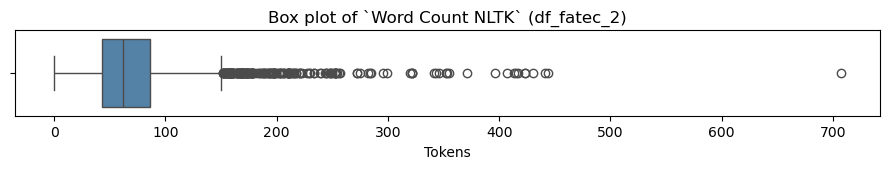

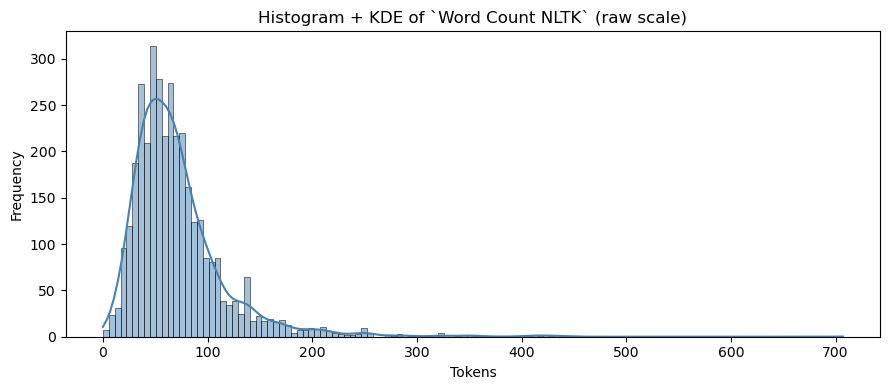

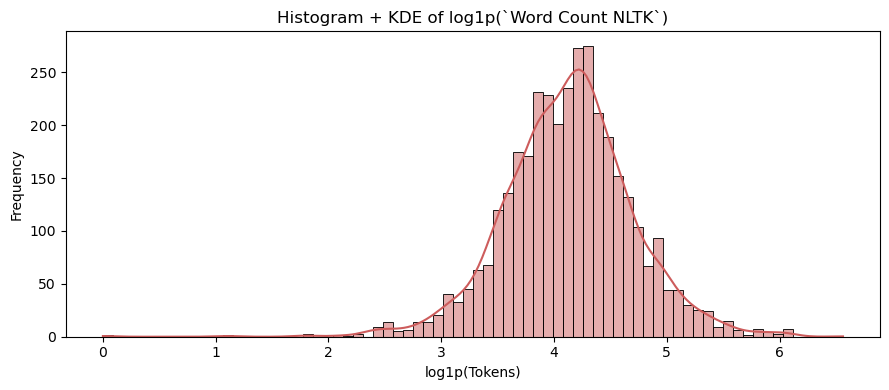

In [34]:
# Select the series
series = df_fatec_2['Word Count NLTK'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("Descriptive statistics for `Word Count NLTK`:")
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_fatec_2.loc[outlier_mask, ['Text ID', 'Section', 'Paragraph', 'Word Count NLTK']]
    .sort_values('Word Count NLTK')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers)

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of `Word Count NLTK` (df_fatec_2)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of `Word Count NLTK` (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(`Word Count NLTK`)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_histogram_log_scale.png", dpi=300)

plt.show()

## Selecting the paragraphs that are within the interquartile range

In [35]:
# Using the full column to create a DataFrame-aligned mask
full_col = df_fatec_2['Word Count NLTK']
iqr_mask = full_col.between(q1, q3, inclusive='both').fillna(False)

# Apply the mask to get only paragraphs within Q1–Q3
df_fatec_iqr = df_fatec_2.loc[iqr_mask].copy()
print(f"Paragraphs within IQR (Q1–Q3): {len(df_fatec_iqr)}")
display(df_fatec_iqr)

Paragraphs within IQR (Q1–Q3): 1821


,Root Directory,Document Type,Year,Branch,Unit,File,File Path,Text ID,Section,Paragraph,Word Count NLTK,Text Paragraph
1,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,1 INTRODUÇÃO,Paragraph 2,81,Por meio do desenvolvimento do presente relató...
2,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,2 SENSIBILIZAÇÃO,Paragraph 1,77,Para a efetivação do cronograma destacam-se al...
5,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,3 DESENVOLVIMENTO,Paragraph 1,62,O Plano de Desenvolvimento institucional (Ano ...
6,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,3 DESENVOLVIMENTO,Paragraph 2,60,A FATEC BS Rubens Lara tem como missão: Promov...
7,cl_st1_ph1_fernanda_folders,cpa,22-23,r06,u005,CPA 2023 Fatec Baixada Santista.pdf,cl_st1_ph1_fernanda_folders\cpa\22-23\r06\u005...,t000000,4 PLANEJAMENTO E AVALIAÇÃO INSTITUCIONAL,Paragraph 1,64,Fortalecer a divulgação do PDI junto aos disce...
...,...,...,...,...,...,...,...,...,...,...,...,...
3554,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,3 COMENTÁRIOS E ESCLARECIMENTOS ADICIONAIS,Paragraph 6,44,Concluímos que o aproveitamento escolar do alu...
3555,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 1,58,Os problemas mais frequentes identificados est...
3557,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 3,75,Outro aspecto examinado foi o perfil emergente...
3558,cl_st1_ph1_fernanda_folders,rade,23-24,r06,u270,RADE e2022_r2024 Fatec_Cotia v.02.pdf,cl_st1_ph1_fernanda_folders\rade\23-24\r06\u27...,t000112,4 CONSIDERAÇÕES GERAIS,Paragraph 4,57,A iniciativa de preparar os alunos para o Exam...


## Export to a file

In [36]:
df_fatec_iqr.to_json(f"{output_directory}/cl_st1_ph1_fernanda_iqr.jsonl", orient='records', lines=True)

In [37]:
df_fatec_iqr.to_excel(f"{output_directory}/cl_st1_ph1_fernanda_iqr.xlsx", index=False)

## Descriptive statistics for `Word Count NLYK` in `df_fatec_iqr`

Descriptive statistics for `Word Count NLTK`:
- Count: 1821
- Mean: 62.06
- Std (sample): 12.12
- Min: 43
- Q1 (25%): 51.00
- Median (50%): 62.00
- Q3 (75%): 72.00
- Max: 86

IQR outlier thresholds:
- Lower fence: 19.50
- Upper fence: 103.50
Outliers found: 0


,Text ID,Section,Paragraph,Word Count NLTK


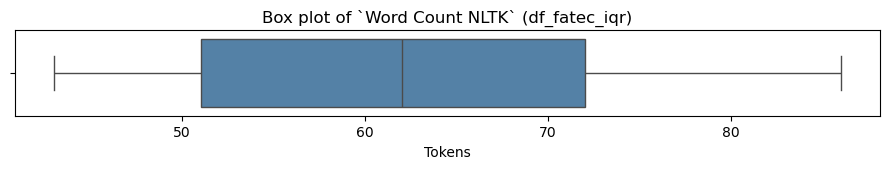

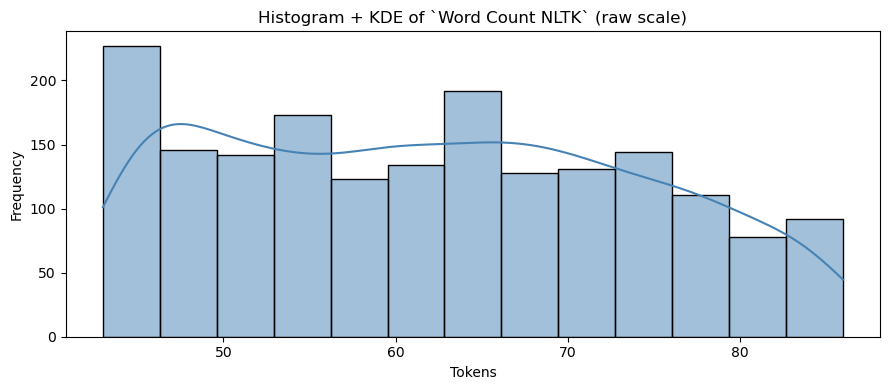

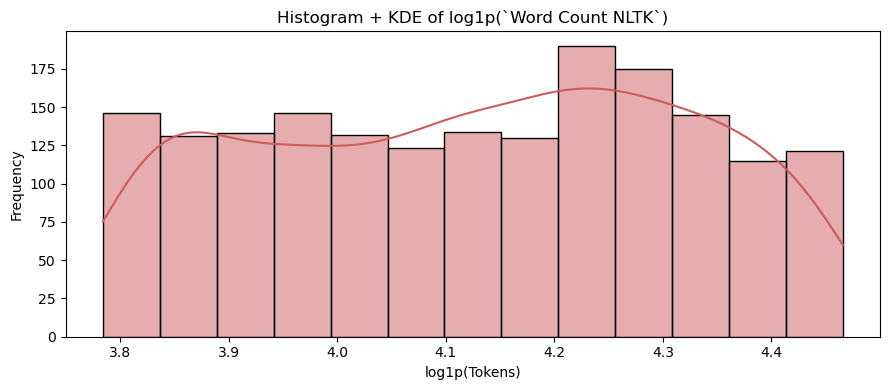

In [38]:
# Select the series
series = df_fatec_iqr['Word Count NLTK'].dropna()

# Summary stats
mean_val = series.mean()
std_val = series.std(ddof=1)  # sample standard deviation
desc = series.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("Descriptive statistics for `Word Count NLTK`:")
print(f"- Count: {int(desc['count'])}")
print(f"- Mean: {mean_val:.2f}")
print(f"- Std (sample): {std_val:.2f}")
print(f"- Min: {int(desc['min'])}")
print(f"- Q1 (25%): {desc['25%']:.2f}")
print(f"- Median (50%): {desc['50%']:.2f}")
print(f"- Q3 (75%): {desc['75%']:.2f}")
print(f"- Max: {int(desc['max'])}")

# IQR-based outlier detection
q1, q3 = series.quantile([0.25, 0.75])
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

outlier_mask = (series < lower_fence) | (series > upper_fence)
outliers = (
    df_fatec_iqr.loc[outlier_mask, ['Text ID', 'Section', 'Paragraph', 'Word Count NLTK']]
    .sort_values('Word Count NLTK')
    .reset_index(drop=True)
)

print(f"\nIQR outlier thresholds:")
print(f"- Lower fence: {lower_fence:.2f}")
print(f"- Upper fence: {upper_fence:.2f}")
print(f"Outliers found: {len(outliers)}")
display(outliers)

# Box plot
plt.figure(figsize=(9, 1.8))
sns.boxplot(x=series, color='steelblue')
plt.title('Box plot of `Word Count NLTK` (df_fatec_iqr)')
plt.xlabel('Tokens')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_iqr_boxplot.png", dpi=300)

plt.show()

# Raw scale: Histogram + KDE
plt.figure(figsize=(9, 4))
sns.histplot(series, bins='auto', kde=True, color='steelblue')
plt.title('Histogram + KDE of `Word Count NLTK` (raw scale)')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_iqr_histogram.png", dpi=300)

plt.show()

# Log scale via transformation: Histogram + KDE
log_series = np.log1p(series)  # log(1 + x) to handle zeros safely
plt.figure(figsize=(9, 4))
sns.histplot(log_series, bins='auto', kde=True, color='indianred')
plt.title('Histogram + KDE of log1p(`Word Count NLTK`)')
plt.xlabel('log1p(Tokens)')
plt.ylabel('Frequency')
plt.tight_layout()

# Saving the plot
plt.savefig(f"{output_directory}/cl_st1_ph1_fernanda_iqr_histogram_log_scale.png", dpi=300)

plt.show()